<a href="https://colab.research.google.com/github/Zeaxanthin80/CAI2300C/blob/main/Assignments/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

## Assignment:
### Building an Embeddings-Based Recommender & Classifier


>**Objective**:

>In this assignment, I will explore the power of **embeddings** by creating:

>1. A **Recommender System** using OpenAI’s embedding models.
>2. A **Classifier** that categorizes text data based on embeddings.
>3. (**Extra Credit**) Integration of a **Vector Database** (AstraDB, Pinecone, or ChromaDB) for efficient similarity searches.



---


---




## Part 1: Understanding Embeddings
1. Research how OpenAI’s text embeddings work and their use cases.
2. Choose or generate a synthetic dataset relevant to a business or industry problem.

>**Example datasets:**
>* Customer reviews for a product recommendation system
* News articles for topic classification
* Medical reports for categorizing health conditions
* Movie descriptions for genre recommendations

### What are Text Embeddings?
>Text embeddings are numerical vector representations of text that capture its semantic meaning.
Instead of treating words as isolated entities, embeddings transform text into a high-dimensional space
where similar meanings are closer together.

>**How Do OpenAI's Embeddings Work?**
>1. Tokenization: The input text is split into smaller units (tokens).
>2. Neural Network Processing: A pre-trained model processes the tokens to generate dense numerical vectors.
>3. Semantic Representation: Similar words, phrases, or documents have embeddings that are **closer** together in the vector space.

>**Use Cases of OpenAI’s Embeddings:**
>- Semantic Search: Find documents or responses based on meaning, not just keywords.
>- Text Similarity: Compare two texts to determine how similar they are.
>- Recommendation Systems: Suggest content based on similarity in meaning.
>- Clustering & Categorization: Group similar documents together for topic classification.
>- Chatbots & Virtual Assistants: Improve contextual understanding in conversations.
>- Anomaly Detection: Identify outliers in text data.

>Example of Embedding Usage:
A query like "How to cook pasta?" and a document titled "Easy pasta recipes" will have similar embeddings,
allowing a search system to match them based on meaning, even without exact word matches.

In [178]:
# This code snippet is primarily focused on importing necessary libraries that will be used later in the notebook.

from openai import OpenAI # This is crucial for interacting with OpenAI's API, allowing me to generate embeddings.
import numpy as np #NumPy is a fundamental library for numerical computations in Python.
import matplotlib.pyplot as plt # Matplotlib is a popular library for creating plots and charts in Python
from sklearn.decomposition import PCA # PCA (Principal Component Analysis) is a dimensionality reduction technique used to simplify complex datasets by transforming them into a lower-dimensional space.
import matplotlib.patches as patches # This module is used for adding shapes (like rectangles, circles, etc.) to plots created with Matplotlib.
from scipy.spatial import distance # This module provides functions for calculating distances between points in space.
import pandas as pd # Thisis for data manipulation and analysis, providing data structures like DataFrames for working with tabular data.
import random # This module provides functions for generating random numbers.
import os # The os module is imported to provide functions for interacting with the operating system.
import csv # This module allows me to save the embedding locally to a csv file.

!pip install chromadb
import chromadb # ChromaDB is an open-source vector database used for efficient similarity searches,

!pip install tiktoken
import tiktoken # tiktoken is a library used by OpenAI for tokenizing text.

In [179]:
# This code is primarily used to retrieve and set up your OpenAI API key for use within a Google Colab environment.
# these lines are setting up secure access to my OpenAI API within this Colab notebook so I can
# use OpenAI's capabilities without exposing my API key directly in the code when pushed to GitHub.
from google.colab import userdata
key = userdata.get('OPENAI_API_KEY')

client = OpenAI(api_key = key)

### Generating Synthetic Data

In [180]:
# This code generates a synthetic movie dataset with movie IDs, titles, descriptions, and genres and
# then neatly organizes it into a DataFrame and saves it for later use.
# This synthetic dataset can then be utilized for building and testing a recommendation system.

# Sample words for generating random movie titles
adjectives = ["Lost", "Mysterious", "Dark", "Galactic", "Quantum", "Eternal", "Forbidden", "Secret", "Hidden", "Haunted"
"Adventurous", "Ambitious", "Brave", "Calm", "Charming", "Clever", "Cunning", "Daring", "Dark", "Delicate",
"Determined", "Elegant", "Enchanted", "Eternal", "Fierce", "Forbidden", "Gentle", "Glorious", "Graceful", "Grim",
"Heroic", "Hidden", "Hollow", "Humble", "Icy", "Legendary", "Lively", "Lonely", "Lost", "Luminous",
"Majestic", "Mysterious", "Noble", "Obscure", "Powerful", "Radiant", "Reckless", "Restless", "Rugged", "Sacred",
"Secret", "Shadowy", "Shimmering", "Silent", "Sinister", "Stubborn", "Swift", "Timeless", "Unbreakable", "Vengeful"
]
nouns = ["Journey", "Warrior", "Galaxy", "Legacy", "Escape", "Revolt", "Curse", "Paradox", "Fortune", "Mystery"
"Adventure", "Battle", "Castle", "Champion", "Chaos", "Chronicle", "City", "Conquest", "Courage", "Curse",
"Darkness", "Destiny", "Dragon", "Dream", "Empire", "Enemy", "Escape", "Explorer", "Fate", "Fortune",
"Galaxy", "Guardian", "Hero", "Honor", "Horizon", "Journey", "Knight", "Labyrinth", "Legacy", "Legend",
"Magic", "Master", "Maze", "Miracle", "Mission", "Mystery", "Nightmare", "Oracle", "Paradox", "Phantom",
"Prophecy", "Quest", "Realm", "Rebel", "Revenge", "Revolt", "Shadow", "Sorcerer", "Storm", "Treasure", "Warrior"
]

# Sample genres
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Cyberpunk", "Dark Fantasy", "Disaster", "Documentary",
"Drama", "Dystopian", "Epic", "Family", "Fantasy", "Film Noir", "Historical", "Horror", "Indie", "Inspirational",
"Martial Arts", "Medieval", "Melodrama", "Military", "Mockumentary", "Musical", "Mystery", "Mythology", "Neo-Noir", "Paranormal",
"Period Drama", "Political", "Post-Apocalyptic", "Psychological", "Reality", "Rom-Com", "Romance", "Samurai", "Satire", "Science Fiction",
"Slapstick", "Space Opera", "Sports", "Spy", "Steampunk", "Superhero", "Supernatural", "Survival", "Thriller", "Western"
]

# Sample phrases for generating random movie descriptions
description_templates = [
    "A {adj} {noun} embarks on an epic adventure to save the world.",
    "In a world filled with {adj} secrets, a {noun} uncovers a hidden truth.",
    "A group of {adj} explorers sets out on a mission to find the legendary {noun}.",
    "When a {noun} discovers a {adj} power, everything changes forever.",
    "A {adj} battle between good and evil takes place in the heart of {noun}.",
    "The fate of humanity rests in the hands of a {adj} {noun}.",
    "A {noun} with a {adj} past is forced to confront their destiny.",
    "An unexpected romance blossoms between a {adj} hero and a {noun}.",
    "A detective must solve the {adj} case of the missing {noun}.",
    "A haunted {noun} holds secrets of a {adj} past.",
    "In a {adj} kingdom, a young {noun} rises to claim their rightful throne.",
    "A {adj} scientist makes a groundbreaking discovery that changes history forever.",
    "A team of {adj} explorers stumbles upon an ancient {noun} with unimaginable power.",
    "A {noun} is chosen to fulfill a {adj} prophecy that could alter the fate of the universe.",
    "When a {adj} rebellion ignites, a lone {noun} must stand against the empire.",
    "A {adj} rivalry between two powerful {noun}s threatens to destroy the world.",
    "Trapped in a {adj} dimension, a {noun} fights to find their way home.",
    "A {adj} warrior is forced to fight in a deadly tournament of champions.",
    "A {adj} storm wipes out civilization, leaving a {noun} struggling for survival.",
    "After discovering a {adj} artifact, a {noun} is hunted by a secret organization.",
    "A {adj} stranger arrives in town, carrying a {noun} that holds a dark secret.",
    "A group of {adj} survivors bands together to fight against an army of {noun}s.",
    "A {adj} experiment goes wrong, unleashing chaos upon an unsuspecting {noun}.",
    "A {adj} hacker uncovers a conspiracy that could shake the foundations of {noun}.",
    "A {noun} must embrace their {adj} destiny to restore balance to the world.",
    "A {adj} time traveler finds themselves trapped in an endless loop of {noun}.",
    "A {adj} thief plans the ultimate heist to steal a priceless {noun}.",
    "A {adj} assassin is given an impossible mission—to eliminate the {noun}.",
    "A {adj} rivalry between two legendary {noun}s leads to a final showdown.",
    "A {noun} discovers a {adj} gateway to another dimension.",
    "A {adj} musician stumbles upon a cursed {noun} that changes their life forever.",
    "A {adj} creature awakens from the depths of the ocean, threatening humanity.",
    "A {noun} with a {adj} secret is pursued by a relentless group of hunters.",
    "A {adj} AI develops emotions and forms an unlikely bond with a {noun}.",
    "A {noun} must outwit a {adj} mastermind in a high-stakes game of survival.",
    "A {adj} bounty hunter is on the trail of the most wanted {noun} in the galaxy.",
    "A {adj} journalist uncovers the shocking truth about a mysterious {noun}.",
    "A {adj} orphan discovers they are the heir to a lost {noun}.",
    "A {adj} knight must retrieve a sacred {noun} to prevent the kingdom's fall.",
    "A {adj} scientist creates a {noun} that can alter reality itself.",
    "A {adj} soldier returns home to find their city ruled by a ruthless {noun}.",
    "A {adj} witch forms an unlikely alliance with a {noun} to defeat an ancient evil.",
    "A {noun} awakens to find themselves in a {adj} version of their own reality.",
    "A {adj} gambler makes a dangerous bet with a powerful {noun}.",
    "A {adj} explorer maps out an uncharted land filled with mythical {noun}s.",
    "A {adj} shipwreck survivor stumbles upon an island ruled by a {noun}.",
    "A {adj} outlaw must team up with a {noun} to escape a deadly pursuit.",
    "A {adj} prisoner is given a chance at freedom in exchange for hunting down a {noun}.",
    "A {adj} rebel leads an uprising against a corrupt {noun} in a dystopian city."
]

# Number of records to generate
num_movies = 250

# Generate movie dataset
# This loop iterates num_movies (250) times to create each movie entry
# The generated data for the movie is appended as a list to the movies list.
movies = []
for i in range(1, num_movies + 1):
    title = f" {random.choice(adjectives)} {random.choice(nouns)}"
    description = random.choice(description_templates).format(adj=random.choice(adjectives), noun=random.choice(nouns))
    genre = random.choice(genres)
    movies.append([i, title, description, genre])

# Create DataFrame from the movie list
df = pd.DataFrame(movies, columns=["Movie_ID", "Title", "Description", "Genre"])

# Display first few rows
print(df.head())

# Create the 'data' directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Save dataset
df.to_csv("./data/synthetic_movies_dynamic.csv", index=False)

   Movie_ID              Title  \
0         1    Secret Conquest   
1         2      Fierce Legend   
2         3   Unbreakable Maze   
3         4      Lost Darkness   
4         5     Clever Paradox   

                                         Description          Genre  
0  A Shadowy storm wipes out civilization, leavin...    Space Opera  
1  The fate of humanity rests in the hands of a H...      Cyberpunk  
2  A Powerful journalist uncovers the shocking tr...  Inspirational  
3  In a Noble kingdom, a young Mystery rises to c...           Epic  
4  A Determined assassin is given an impossible m...      Political  


In [181]:
# This function is designed to take information about a single movie and format it into a specific text structure
def create_movie_text(movie):
    # Removes newline escape characters within movie attributes
    title = movie['Title'].replace('\n', ' ')
    genre = movie['Genre'].replace('\n', ' ')
    description = movie['Description'].replace('\n', ' ')

    return (
        f"Title: {title}\n"
        f"Genre: {genre}\n"
        f"Description: {description}"
    )

# Assuming 'df' is your DataFrame containing the movie data
movie_texts = df.apply(create_movie_text, axis=1).tolist()
# print(movie_texts)

# Print the first 5 movie texts in a table format
from IPython.display import display, HTML

# Create an HTML table
table_html = "<table><tr><th>Movie</th><th>Title</th><th>Genre</th><th>Description</th></tr>"
for i in range(5):  # Loop through the first 5 movies
    movie_text = movie_texts[i]

    # Extract title, genre, and description using string manipulation
    title = movie_text.split('\n')[0].split(': ')[1]
    genre = movie_text.split('\n')[1].split(': ')[1]
    description = movie_text.split('\n')[2].split(': ')[1]

    # Add a row to the HTML table
    table_html += f"<tr><td>{i+1}</td><td>{title}</td><td>{genre}</td><td>{description}</td></tr>"

table_html += "</table>"

# Display the HTML table
display(HTML(table_html))

Movie,Title,Genre,Description
1,Secret Conquest,Space Opera,"A Shadowy storm wipes out civilization, leaving a Warrior struggling for survival."
2,Fierce Legend,Cyberpunk,The fate of humanity rests in the hands of a Hidden Paradox.
3,Unbreakable Maze,Inspirational,A Powerful journalist uncovers the shocking truth about a mysterious Battle.
4,Lost Darkness,Epic,"In a Noble kingdom, a young Mystery rises to claim their rightful throne."
5,Clever Paradox,Political,A Determined assassin is given an impossible mission—to eliminate the Chaos.


In [182]:
'''This function's main purpose is to take a movie's information (title, genre, description)
   which is initially formatted with newlines (\n) and reformat it into a single string where
   the elements are separated by commas.'''
def combine_movie_info_to_string(movie_text):
  """Combines title, genre, and description within a movie text string."""
  # Extract title, genre, and description using string manipulation
  # Assuming the structure is "Title: ...\nGenre: ...\nDescription: ..."
  title = movie_text.split('\n')[0].split(': ')[1]  # Split by newline instead of comma
  genre = movie_text.split('\n')[1].split(': ')[1]  # Split by newline instead of comma
  description = movie_text.split('\n')[2].split(': ')[1]  # Split by newline instead of comma

  # Truncate description to 10 words
  description_words = description.split()  # Split description into words
  truncated_description = ' '.join(description_words[:7])  # Join first 10 words

  # Create the combined string with commas and truncated description
  combined_string = f"Title: {title}, Genre: {genre}, Description: {truncated_description}..."
  return combined_string

# Assuming movie_texts now contains strings with commas
# Example: "Title: Movie Title, Genre: Action, Description: Movie description here"
combined = [combine_movie_info_to_string(text) for text in movie_texts]

# Print the first 5 elements of the combined list
for i in range(5):  # Loop through the first 5 elements
    print(combined[i])  # Print each element

Title:  Secret Conquest, Genre: Space Opera, Description: A Shadowy storm wipes out civilization, leaving...
Title:  Fierce Legend, Genre: Cyberpunk, Description: The fate of humanity rests in the...
Title:  Unbreakable Maze, Genre: Inspirational, Description: A Powerful journalist uncovers the shocking truth...
Title:  Lost Darkness, Genre: Epic, Description: In a Noble kingdom, a young Mystery...
Title:  Clever Paradox, Genre: Political, Description: A Determined assassin is given an impossible...




---



---



## Part 2: Build a Recommender
>3. Use OpenAI’s embedding models to **generate vector representations** of your dataset.
>4. Implement a **similarity search** function to recommend similar items based on user input.
>5. Test your system by providing different queries and observing the quality of recommendations.

>**Deliverables for Recommender System**:
>* Code implementation (Jupyter Notebook or Python script).
>* Explanation of your use case, dataset, and how recommendations are generated.
>* Sample queries and the system’s responses.

### Generate Embeddings

In [183]:
def create_embeddings(texts, model = "text-embedding-3-small"):
    """
    Generates embeddings for a list of texts using the OpenAI API.

    Args:
        texts (list): A list of text strings to generate embeddings for.

    Returns:
        list: A list of embedding vectors, one for each input text.
    """
    embeddings = []
    for text in texts:
        response = client.embeddings.create(
            input = text,
            model = model
        )
        embeddings.append(response.data[0].embedding)
    return embeddings

In [184]:
movies_texts = combined  # combined already contains the desired movie texts
movies_embeddings = create_embeddings(movies_texts)
# print(movies_embeddings)

In [267]:
# Specify the file path
embedding_file_path = "./data/movie_embeddings.csv"

# Open the CSV file in write mode
with open(embedding_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # # Write the header (optional)
    # writer.writerow(["Movie_ID", "Embedding"])

    # Write the data
    for i, embedding in enumerate(movies_embeddings):
        writer.writerow([i + 1, embedding])  # Assuming Movie_ID starts from 1

### Similarity Search Function

In [185]:
def find_n_closest(query_vector, embeddings, n=3):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  distances_sorted = sorted(distances, key=lambda x: x["distance"])
  return distances_sorted[0:n]

### Testing and Recommendations

In [186]:
query_text = "AI"
query_vector = create_embeddings(query_text)[0]
hits = find_n_closest(query_vector, movies_embeddings)
for hit in hits:
  movie = movies_texts[hit['index']]  # Use movies_texts
  # print(movie) # Print the entire movie text or extract specific info like title

  # Split the movie text into lines, using commas as delimiters
  lines = movie.split(',')  # Split by comma instead of newline

  # Extract title, genre, and description from the split lines
  title = lines[0].split(': ')[1] if len(lines) > 0 else "Title not found"
  genre = lines[1].split(': ')[1] if len(lines) > 1 else "Genre not found"
  description = lines[2].split(': ')[1] if len(lines) > 2 else "Description not found"

  # Print the title, genre, and description with aligned colons
  print(f"      Title:{title}")
  print(f"      Genre: {genre}")
  print(f"Description: {description}")

  print("\n")  # Add an empty line for better readability

      Title: Luminous Honor
      Genre: Romance
Description: A Lively scientist creates a Destiny that...


      Title: Elegant Explorer
      Genre: Melodrama
Description: A Clever AI develops emotions and forms...


      Title: Powerful Champion
      Genre: Historical
Description: A Hidden assassin is given an impossible...




### Visualizing Embeddings

>Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data (like our embeddings) into a lower-dimensional space while preserving as much variance as possible. In our case, we're reducing the embeddings to 2 dimensions for visualization.

>**Principal Components:**
* **Principal Component 1 (PC1)**: This represents the direction in the original embedding space that captures the largest amount of variance in the data. In other words, it's the axis along which the embeddings are most spread out or have the most significant differences.
* **Principal Component 2 (PC2)**: This represents the direction that captures the second largest amount of variance, orthogonal (perpendicular) to PC1. It's the axis that explains the next most significant variation in the data, independent of PC1.

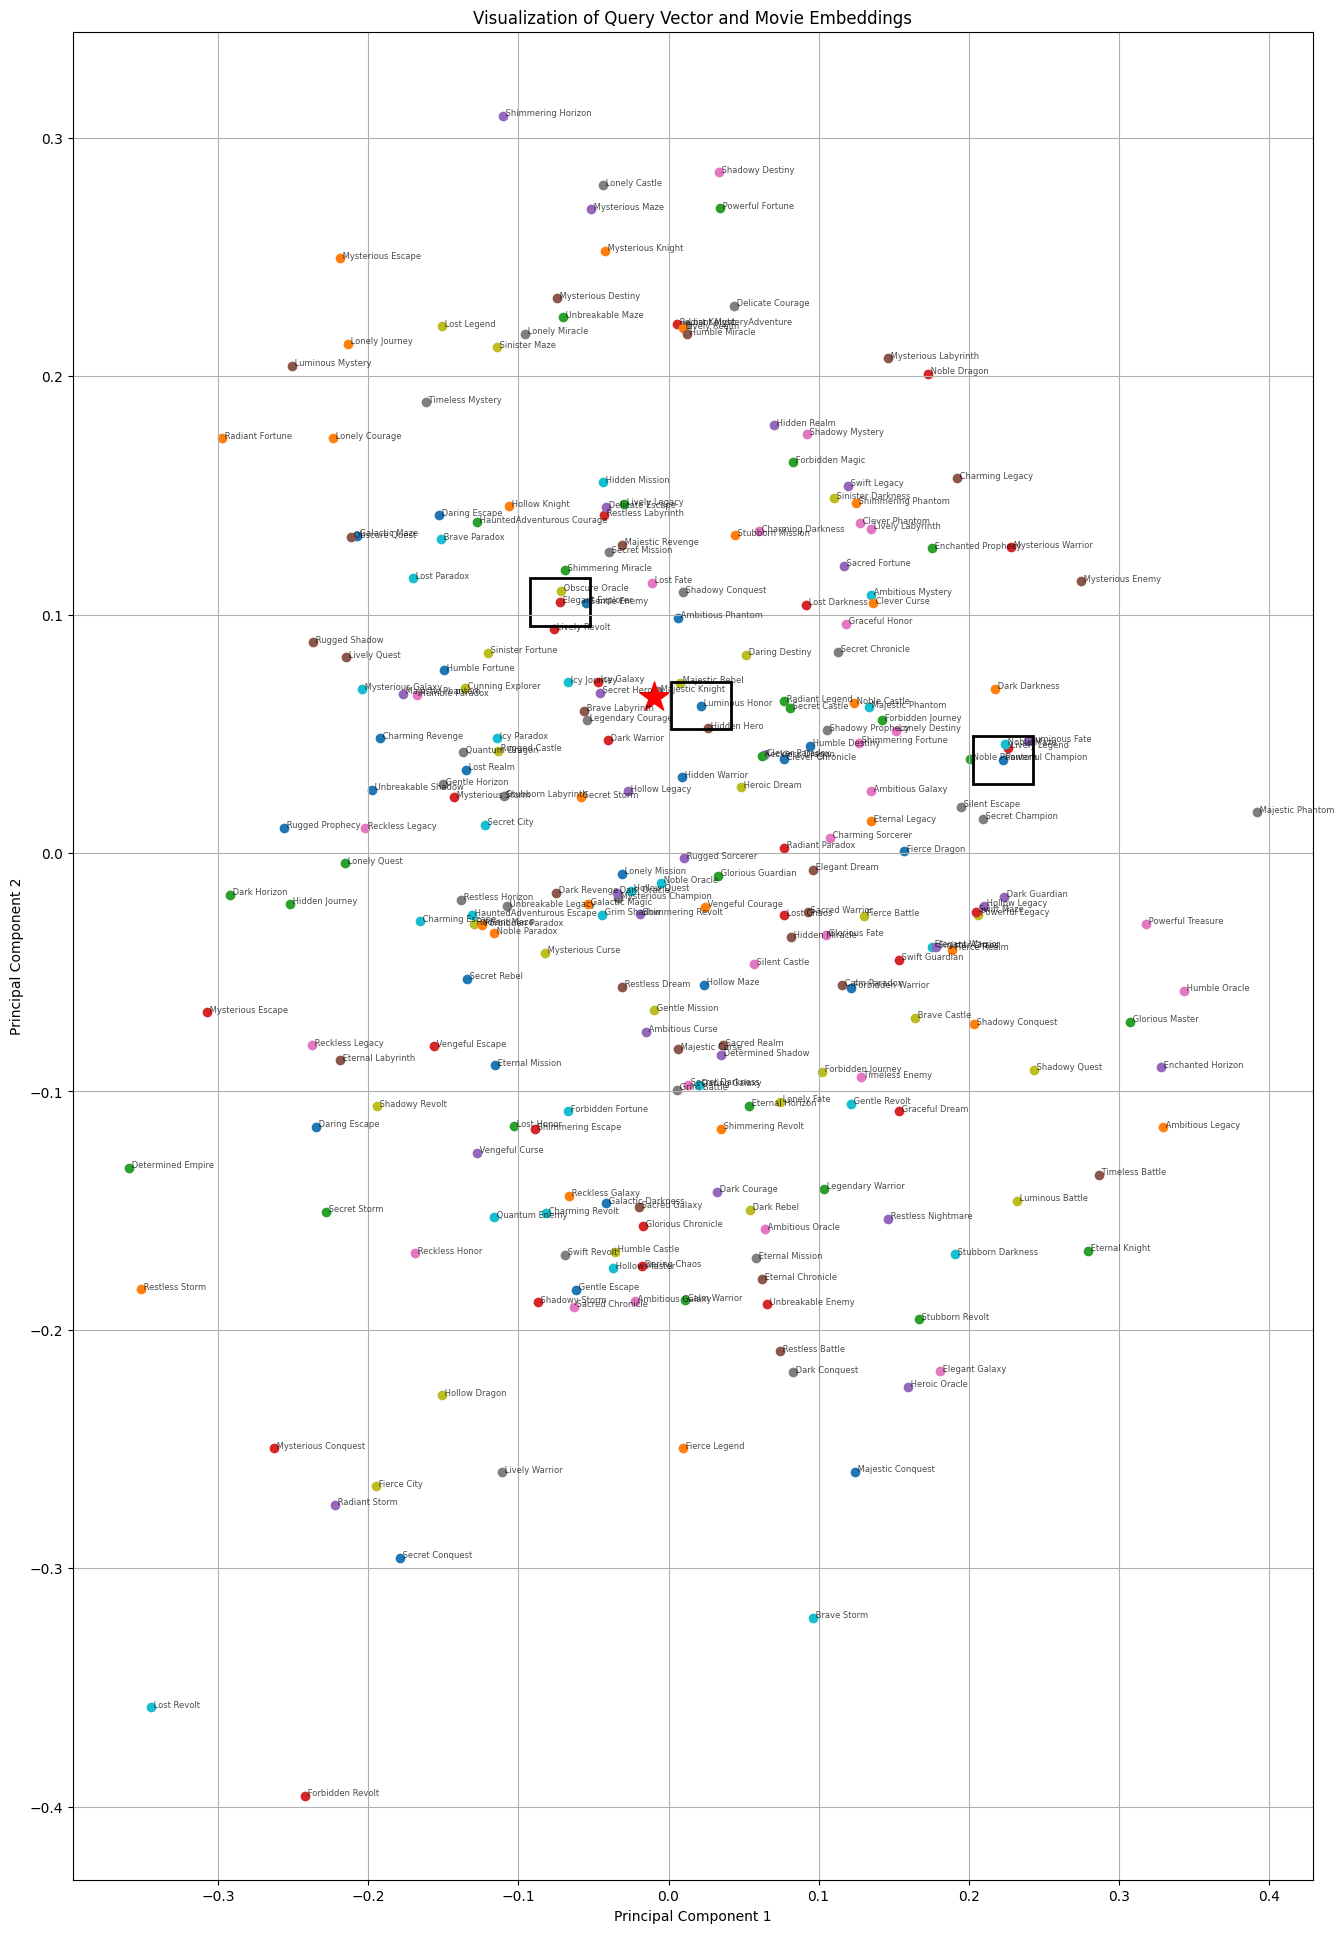

In [187]:
# Visualizing Query Vector and Movie Embeddings
# The idea is to project both the query_vector and the movies_embeddings
# onto the same 2D space using PCA and then plot them together on a scatter plot.
# This will allow me to see where the query lies in relation to the movies
# and visually understand which movies are closest to the query.


# 1. Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_movie_embeddings = pca.fit_transform(movies_embeddings) # Apply PCA to movie embeddings
reduced_query_embedding = pca.transform([query_vector]) # Apply the same PCA transformation to the query vector

# 2. Create the scatter plot
plt.figure(figsize=(16, 24))

# 3. Plot movie embeddings with labels
for i, movie_embedding in enumerate(reduced_movie_embeddings):
    plt.scatter(movie_embedding[0], movie_embedding[1])
    movie_title = df['Title'].iloc[i]
    plt.annotate(movie_title, (movie_embedding[0], movie_embedding[1]), fontsize=6, alpha=0.7)

# 4. Plot query embedding
plt.scatter(reduced_query_embedding[0][0], reduced_query_embedding[0][1], # Access the components of the reduced query embedding
            marker='*', color='red', s=500)

# 5. Highlight closest matches
for hit in hits:  # Assuming 'hits' is the result of find_n_closest
    index = hit['index']
    movie_embedding = reduced_movie_embeddings[index]
    # Create a rectangle patch
    rect = patches.Rectangle((movie_embedding[0] - 0.02, movie_embedding[1] - 0.01),
                             0.04, 0.02, linewidth=2, edgecolor='black', facecolor='none')
    # Add the patch to the plot
    plt.gca().add_patch(rect)

# Add title, labels, grid and adjust zoom if needed
plt.title("Visualization of Query Vector and Movie Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
# Adjust limits or use plt.xlim and plt.ylim for zooming

plt.show()



---



---



## Part 3: Build a Classifier
6. Build an embedding centric classifier.
7. Define **clear categories** (e.g., positive/negative sentiment, topic classification, fraud detection).
8. Evaluate its accuracy and effectiveness.

**Deliverables for Classifier:**
* Code implementation.
* Explanation of classification logic and dataset.
* Performance analysis (accuracy, precision, recall, or confusion matrix).

### Defining Categories

In [188]:
# Legal Document Classification Dataset
# Each dictionary in the Python list contains:

# "category" – The legal document type.
# "text" – A sample excerpt from that type of document.

legal_documents = [
    {"category": "Contracts", "text": "This agreement is made and entered into as of the effective date between the parties involved."},
    {"category": "Patents", "text": "A method for optimizing data processing, comprising: receiving input data and executing an algorithm."},
    {"category": "Court Rulings", "text": "The defendant is hereby sentenced to a term of imprisonment not exceeding five years."},
    {"category": "Regulations", "text": "Pursuant to Section 15 of the Environmental Act, all companies must comply with emission standards."},
    {"category": "Privacy Policies", "text": "We collect user data to improve our services. Your information will not be shared without consent."},
    {"category": "Case Law", "text": "In Smith v. Jones (2020), the court held that the employer was liable for workplace discrimination."},
    {"category": "Wills & Testaments", "text": "I, John Doe, being of sound mind, declare this to be my last will and testament."},
    {"category": "Employment Agreements", "text": "The employee agrees to perform the duties outlined in this contract under the following terms."},
    {"category": "Intellectual Property", "text": "Any reproduction or redistribution of this work without permission is strictly prohibited."},
    {"category": "Real Estate Documents", "text": "The property described herein shall be transferred to the buyer upon full payment of the agreed price."}
]

def legal_doc_to_string(doc):
  """Converts a legal document dictionary to a comma-separated string."""
  return f"Category: {doc['category']}\nText: {doc['text']}"

legal_doc_strings = [legal_doc_to_string(doc) for doc in legal_documents]

# ... (previous code remains the same) ...

# Print the resulting list of strings, each on a new line with truncated text
for doc_string in legal_doc_strings:
    # Extract the text portion using string splitting
    # Now this split will work as expected
    text_part = doc_string.split('\nText: ')[1]

    # Truncate the text to 8 words
    text_words = text_part.split()
    truncated_text = ' '.join(text_words[:8])

    # Print the document string with truncated text
    print(doc_string.split('\nText: ')[0] + '\nText: ' + truncated_text + "...")
    print("—"*16)

Category: Contracts
Text: This agreement is made and entered into as...
————————————————
Category: Patents
Text: A method for optimizing data processing, comprising: receiving...
————————————————
Category: Court Rulings
Text: The defendant is hereby sentenced to a term...
————————————————
Category: Regulations
Text: Pursuant to Section 15 of the Environmental Act,...
————————————————
Category: Privacy Policies
Text: We collect user data to improve our services....
————————————————
Category: Case Law
Text: In Smith v. Jones (2020), the court held...
————————————————
Category: Wills & Testaments
Text: I, John Doe, being of sound mind, declare...
————————————————
Category: Employment Agreements
Text: The employee agrees to perform the duties outlined...
————————————————
Category: Intellectual Property
Text: Any reproduction or redistribution of this work without...
————————————————
Category: Real Estate Documents
Text: The property described herein shall be transferred to...
—————————————

### Generate Embeddings

In [189]:
legal_doc_embeddings = create_embeddings(legal_doc_strings)



---



### Similarity Search Function

In [190]:
# Step 1: Create Embeddings for Query
legal_query_text = "I need legal documents about job contracts and employment agreements."
legal_query_response = create_embeddings(legal_query_text)

# Access the first element of the list, which contains the embedding
legal_query_embedding = legal_query_response[0]  # Extract query embedding

In [191]:
# Step 2: Compute Cosine Similarity with Stored Embeddings
def get_similarity(doc_embedding, query_embedding):
    """
    Calculates the cosine similarity between two embedding vectors.

    Args:
        doc_embedding: The embedding of the document.
        query_embedding: The embedding of the query.

    Returns:
        The cosine similarity between the two embeddings.
    """
    return 1 - distance.cosine(doc_embedding, query_embedding)  # Cosine similarity (1 - distance)

In [192]:
# Step 3: Rank Documents by Similarity
# legal_doc_embeddings is already computed, need to create a new structure
# combining the doc_embedding with the legal_document
similarity_scores = []
for i, doc in enumerate(legal_documents):
  similarity_scores.append({
      "document": doc,
      "similarity": get_similarity(legal_doc_embeddings[i], legal_query_embedding) # Assuming legal_doc_embeddings exists
  })

In [193]:
# Sort by highest similarity
similarity_scores.sort(key=lambda x: x["similarity"], reverse=True)

In [194]:
# Step 4: Retrieve Top Matching Document
top_document = similarity_scores[0]["document"]
print("Most Relevant Category:", top_document["category"])
print("Similarity Score:", similarity_scores[0]["similarity"])

Most Relevant Category: Wills & Testaments
Similarity Score: 0.2626325845216797


In [195]:
print("Embeddings:")
# Ensure you iterate within the bounds of the shortest list (topics in this case)
for i, embedding in enumerate(legal_doc_embeddings[:len(legal_documents)]):
    print(f"{legal_documents[i]['category']}: {embedding[:4]}...")  # Print first 5 elements for brevity

Embeddings:
Contracts: [-0.030473152175545692, 0.03952725976705551, 0.012804129160940647, 0.0015104255871847272]...
Patents: [-0.01979513093829155, 0.046041663736104965, 0.005119930487126112, -0.028845658525824547]...
Court Rulings: [-0.03630661964416504, 0.04192286729812622, -0.010933997109532356, 0.015997465699911118]...
Regulations: [0.040508199483156204, 0.0407840758562088, 0.03694476559758186, 0.018702281638979912]...
Privacy Policies: [0.01621452532708645, 0.023826729506254196, 0.0380929559469223, 0.03408989682793617]...
Case Law: [0.0156608447432518, 0.010334623046219349, -0.0012281269300729036, 0.031080584973096848]...
Wills & Testaments: [0.030625466257333755, 0.04564689099788666, -0.002118324860930443, 0.02286144159734249]...
Employment Agreements: [-0.06962058693170547, 0.030892444774508476, 0.03879568725824356, 0.022426294162869453]...
Intellectual Property: [0.011886405758559704, 0.03626202419400215, -0.031720489263534546, 0.013882104307413101]...
Real Estate Documents: [0

### Visualizing Embeddings

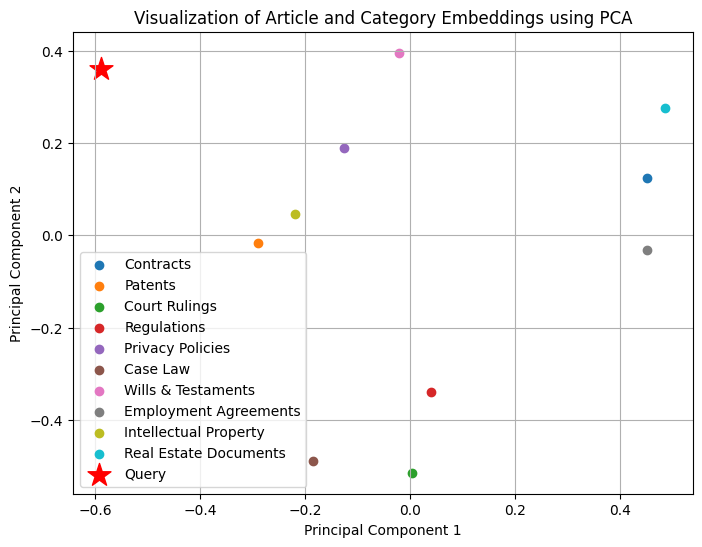

In [196]:
# Assuming 'class_embeddings', 'topics', and 'article_embeddings' has already been created

# 1. Combines embeddings for PCA
all_embeddings = legal_doc_embeddings + [legal_query_embedding]  # Adds article embedding to the list

# 2. Applies PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_embeddings = pca.fit_transform(all_embeddings)

# 3. Separate the embeddings for plotting
reduced_class_embeddings = reduced_embeddings[:-1]  # Embeddings for categories
reduced_article_embedding = reduced_embeddings[-1]  # Embedding for the article

# 4. Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot category embeddings
# Changed 'category' to 'legal_documents' to access category information
for i, embedding in enumerate(reduced_class_embeddings):
    plt.scatter(embedding[0], embedding[1], label=legal_documents[i]['category'])

# Plot article embedding with a different marker and color
plt.scatter(reduced_article_embedding[0], reduced_article_embedding[1],
            marker='*', color='red', s=300, label='Query')

# 5. Add labels and title
plt.legend()
plt.title("Visualization of Article and Category Embeddings using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()



---



---



## Extra Credit: Integrate a Vector Database
🔹 **Challenge**: Instead of storing and retrieving embeddings in memory, integrate a **vector database** such as:

* **AstraDB** (built on Apache Cassandra)
* **Pinecone** (real-time vector search)
* **ChromaDB** (open-source vector store)

🔹 Store embeddings in the database and retrieve relevant results dynamically.

🔹 Explain how the integration improves scalability and search efficiency.



---



---



---



### Adding the Content to the Database

**In simpler terms:**

Imagine a library where you want to store legal documents. This code is like:

1. Assigning a unique ID number to each document (like a library catalog number).
2. Storing the actual document text on the shelves.
3. Creating a separate card catalog with a short summary or key features of each document (this is the embedding) to help you find similar documents quickly.

**Why is this useful?**

* **Efficient search**: The embeddings allow the database to search for documents based on meaning, not just keywords. This is much faster and more effective.
* **Scalability**: A vector database can handle massive amounts of data. By storing embeddings, searching and retrieving information becomes much quicker even with a large dataset.

By adding these IDs, documents, and embeddings to the chromadb collection, the system can effectively store and retrieve legal documents based on their content, making the process more scalable and efficient.

### Inspecting collections

## Calculating Cost

In [ ]:
enc = tiktoken.encoding_for_model("text-embedding-3-small")

total_tokens = 0
for doc in legal_doc_strings:
    total_tokens += len(enc.encode(doc))

cost_per_token = 0.02 / 1000  # $0.02 per 1,000,000 tokens
total_cost = total_tokens * cost_per_token

print("Total Tokens: " + str(total_tokens))
print("Total Cost $ " + str(total_cost))